<a href="https://colab.research.google.com/github/shahjan49/CODSOFT/blob/main/CODSOFT_task_1_Titanic_Survival_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder

Load Data and shows first 10 rows of data.

In [ ]:
data=pd.read_csv("/content/tested.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Drop Unnecessary values

In [ ]:
data_new=data.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
data_new.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


Calculates statistical values and rounds them to 3 decimal places.

In [ ]:
data_new.describe().round(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000,418.000,332.000,418.000,418.000,417.000
mean,0.364,2.266,30.273,0.447,0.392,35.627
std,0.482,0.842,14.181,0.897,0.981,55.908
min,0.000,1.000,0.170,0.000,0.000,0.000
25%,0.000,1.000,21.000,0.000,0.000,7.896
50%,0.000,3.000,27.000,0.000,0.000,14.454
75%,1.000,3.000,39.000,1.000,0.000,31.500
max,1.000,3.000,76.000,8.000,9.000,512.329


Mark null values as True and returns sum of number of True values in each column

In [ ]:
data_new.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Handling Null Values and Pre Processing the dataset.

In [ ]:
data_new['Age']=data_new['Age'].fillna(data_new['Age'].mean())
data_new['Fare']=data_new['Fare'].fillna(data_new['Fare'].mean())
data_new.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Data Visualization

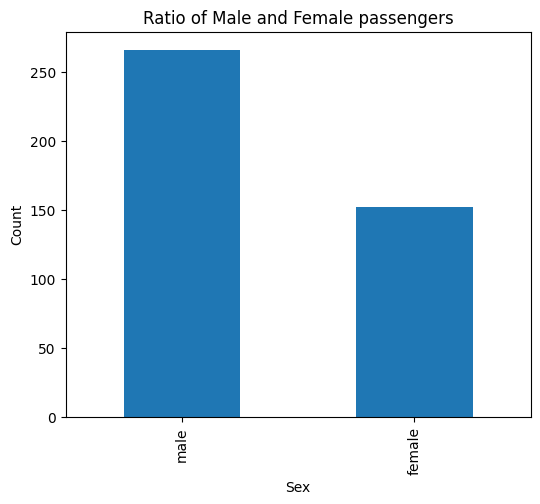

In [ ]:
ax=data_new['Sex'].value_counts().plot(kind='bar',x = 'Survived',figsize=(6,5))    # creating coundplot
plt.title("Ratio of Male and Female passengers")
plt.ylabel("Count")
plt.xlabel("Sex")
plt.show()

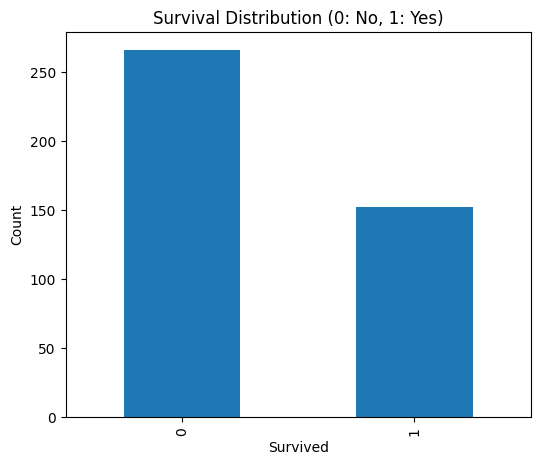

In [ ]:
ax=data_new['Survived'].value_counts().plot(kind='bar',figsize=(6,5))    # creating coundplot
plt.title("Survival Distribution (0: No, 1: Yes)")
plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()

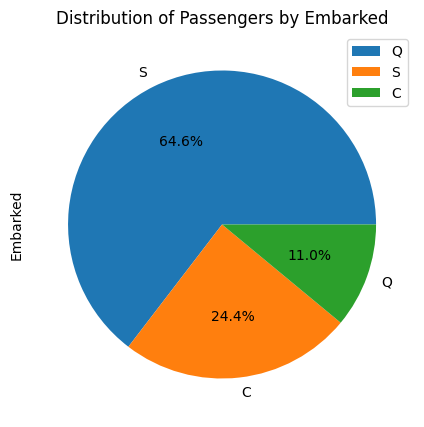

In [ ]:
ax=data_new['Embarked'].value_counts().plot(kind='pie',figsize=(6,5),autopct='%1.1f%%')
plt.title("Distribution of Passengers by Embarked")
plt.legend(["Q", "S", "C"])
plt.show()

[]

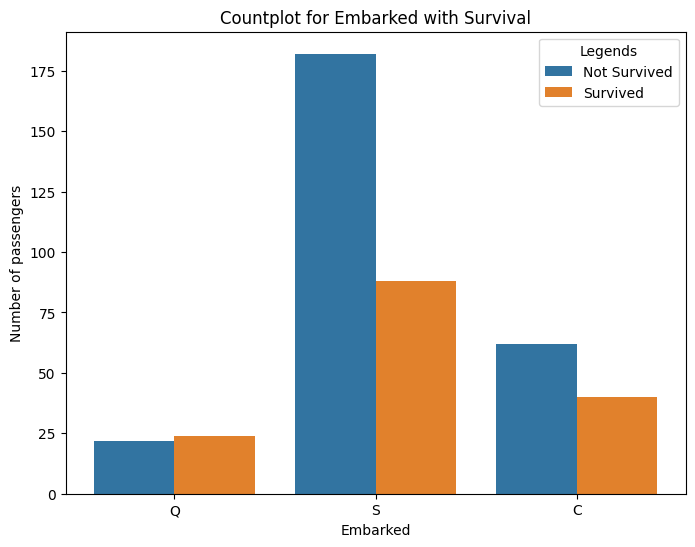

In [ ]:
_, ax = plt.subplots(figsize = (8, 6))
snr.countplot(data = data_new, x = "Embarked", hue = "Survived", ax = ax)
ax.set_title("Countplot for Embarked with Survival")
ax.set_xlabel("Embarked")
ax.set_xticklabels(["Q", "S", "C"])
ax.set_ylabel("Number of passengers")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.plot()

Change the catagorical data into numerical data by using OneHotEncoding.

In [ ]:
data_new['Sex']=data_new['Sex'].apply({'male':1,'female':0}.get)
data_new['Embarked']=data_new['Embarked'].apply({'S':1,'Q':2,'C':3}.get)
data_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,2
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,2
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


Deviding the data into Dependent and Independent variables.

In [ ]:
x=data_new.drop(['Survived'],axis=1)
y=data_new['Survived']

Deviding the cleaned data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

Creating first machine learning model 'k-nearest neighbour'.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

Train the model

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

Make predictions on model

In [ ]:
predictions=knn.predict(x_test)
print(predictions)

[0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 1 0 0 0 0]


Check the Confusion metrix and Accuracy score.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [ ]:
print(cm)

[[44 11]
 [10 19]]


In [ ]:
print(ac)

0.75


Creating Second Machine Learning Model 'Decision Tree'.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions=tree.predict(x_test)
print(predictions)

[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0]


Check the Confusion metrix and Accuracy score.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [ ]:
print(cm)

[[55  0]
 [ 0 29]]


In [ ]:
print(ac)

1.0


Creating third machine learning model 'Support Vector Machine'.

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
predictions=svm.predict(x_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


Check the Confusion metrix and Accuracy score.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
ac=accuracy_score(y_test,predictions)
cm=confusion_matrix(y_test,predictions)

In [ ]:
print(cm)

[[53  2]
 [28  1]]


In [ ]:
print(ac)

0.6428571428571429
